Filename: REALLYHW4DATA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (6292,)   uint8   
  1  sync          1 BinTableHDU     44   6987R x 6C   [D, D, D, D, E, E]   
  2  sync          1 BinTableHDU     44   4258R x 6C   [D, D, D, D, E, E]   
  3  sync          1 BinTableHDU     44   355483R x 6C   [D, D, D, D, E, E]   
SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                 6292 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT                                                                         COMMENT The data in this primary HDU consists of bytes 

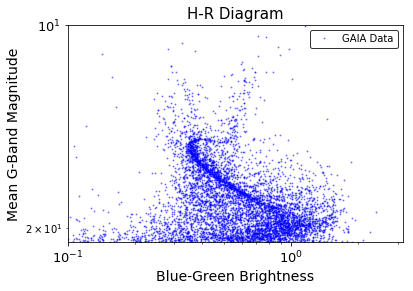

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
c = SkyCoord('16h32m31.8s', '-13d03m13.6s', frame='icrs') #Converting coordinates
M104dist=(10**(4.26/5))*0.9 #Calculated distance to Globular Cluster, magnitude offset +4.26, using 0.9kpcs distance for M67
hdul = fits.open('REALLYHW4DATA.fits') #Opening the fits file
hdul.info()
hdr = hdul[0].header
print(hdr) 
cols=hdul[1].columns #Inspecting columns
cols.info()
coadd=hdul[1].data
bluegreen=coadd.field('bp_g') #Assigning desired values to arrays
meanmag=coadd.field('phot_g_mean_mag')
plt.loglog(bluegreen, meanmag, 'ob', markersize=1, alpha=0.4, label='GAIA Data') #Plotting data
plt.title('H-R Diagram', size=15) #M107 is the oldest cluster and NGC188 is the youngest. The turn-off point indicates the age.
plt.xlabel('Blue-Green Brightness', size=14) #M67 is the closest and M107 is the farthest away. This is indicated by the apparent magnitude.
plt.ylabel('Mean G-Band Magnitude', size=14)
plt.xlim(10**-1, 10**(0.5))
plt.ylim(10, 21)
plt.xticks(size=13)
plt.yticks(size=13)
plt.gca().invert_yaxis()
plt.legend(edgecolor='black')
print('Converted Coordinates: ',c)
print('Calculated Distance: ',M104dist*u.kpc)
plt.show()